Task 3 - Car Price Prediction With Machine Learning

Importing Libraries

In [33]:
import numpy as np
import pandas as pd

In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

import math
from sklearn.pipeline import make_pipeline

In [64]:
import pickle

Load Dataset

In [34]:

df=pd.read_csv('car.csv')

Data Pre-processing

In [35]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [37]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [38]:
backup=df.copy()

In [39]:
df.isna().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


In [40]:
df=df[~df['fuel_type'].isna()]

In [41]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
832,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
833,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
834,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
835,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [46]:
df=df[df['year'].astype(str).str.isnumeric()]
df['year']=df['year'].astype(int)
df=df[df['Price']!="Ask For Price"]
df['Price']=df['Price'].str.replace(',','').astype(int)

In [47]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [48]:
df=df[df['kms_driven'].str.isnumeric()]
df['kms_driven']=df['kms_driven'].astype(int)
df['name']=df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [49]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [50]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [51]:
df=df[df['Price']<6e6].reset_index(drop=True)

Train-Test Split

In [52]:
x=df.drop(columns='Price')
y=df['Price']

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [54]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
df1=OneHotEncoder()
df1.fit(df[['name','company','fuel_type']])

OneHotEncoder()

In [55]:

from sklearn.compose import make_column_transformer
column_trans= make_column_transformer((OneHotEncoder(categories=df1.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')

In [58]:
xgbr=XGBRegressor()
pipe=make_pipeline(column_trans,xgbr)
pipe.fit(x_train,y_train)
y_pred_xgbr=pipe.predict(x_test)
r2=r2_score(y_test,y_pred_xgbr)

In [59]:
r2

0.5233921408653259

In [60]:
score=[]
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    xgbr=XGBRegressor()
    pipe=make_pipeline(column_trans,xgbr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [61]:
score[np.argmax(score)]

0.8906548619270325

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(score))
xgbr=XGBRegressor()
pipe=make_pipeline(column_trans,xgbr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8906548619270325

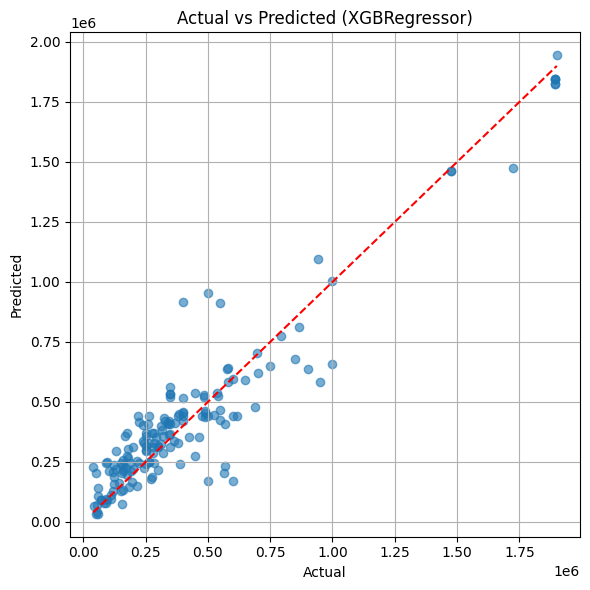

In [66]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (XGBRegressor)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
pipe.predict(pd.DataFrame([['Ford Figo','Ford',2014,175000,'Diesel']],
            columns=['name','company','year','kms_driven','fuel_type']))

array([331468.97], dtype=float32)

Saving the Model

In [65]:
pickle.dump(pipe,open('car_price.pkl','wb'))